In [142]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', '{:.2f}'.format) 

In [185]:
df = pd.read_csv('turnstile_200111.csv')

In [186]:
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [187]:
def outlier_check(df, station, scp, n=50):
    return df[(df.STATION == station) & (df.SCP == scp)].head(n)

outlier_check(df,'3 AV-149 ST', '00-00-03', 30)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
173037,R311,R053,00-00-03,3 AV-149 ST,25,IRT,01/04/2020,03:00:00,REGULAR,110085538,115095248
173038,R311,R053,00-00-03,3 AV-149 ST,25,IRT,01/04/2020,07:00:00,REGULAR,110085555,115095288
173039,R311,R053,00-00-03,3 AV-149 ST,25,IRT,01/04/2020,11:00:00,REGULAR,110085658,115095466
173040,R311,R053,00-00-03,3 AV-149 ST,25,IRT,01/04/2020,15:00:00,REGULAR,110085829,115095669
173041,R311,R053,00-00-03,3 AV-149 ST,25,IRT,01/04/2020,19:00:00,REGULAR,110086039,115095992
173042,R311,R053,00-00-03,3 AV-149 ST,25,IRT,01/04/2020,23:00:00,REGULAR,110086134,115096276
173043,R311,R053,00-00-03,3 AV-149 ST,25,IRT,01/05/2020,03:00:00,REGULAR,110086169,115096406
173044,R311,R053,00-00-03,3 AV-149 ST,25,IRT,01/05/2020,07:00:00,REGULAR,110086193,115096444
173045,R311,R053,00-00-03,3 AV-149 ST,25,IRT,01/05/2020,11:00:00,REGULAR,110086279,115096623
173046,R311,R053,00-00-03,3 AV-149 ST,25,IRT,01/05/2020,15:00:00,REGULAR,110086385,115096866


In [163]:
outlier_check(df,'42 ST-PORT AUTH', '01-00-01',50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
51263,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,01/04/2020,01:00:00,REGULAR,14969295,13599505
51264,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,01/04/2020,05:00:00,REGULAR,14969364,13599532
51265,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,01/04/2020,09:00:00,REGULAR,14969413,13599706
51266,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,01/04/2020,13:00:00,REGULAR,14969591,13600145
51267,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,01/04/2020,17:00:00,REGULAR,14969929,13600809
51268,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,01/04/2020,21:00:00,REGULAR,14970239,13601486
51269,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,01/05/2020,01:00:00,REGULAR,14970830,13601810
51270,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,01/05/2020,05:00:00,REGULAR,14970900,13601839
51271,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,01/05/2020,09:00:00,REGULAR,14970935,13601959
51272,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,01/05/2020,13:00:00,REGULAR,14971058,13602347


In [165]:
outlier_check(df,'FLATBUSH AV-B.C', '01-00-01', 20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
203213,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,01/04/2020,00:00:00,REGULAR,1506661752,1313904818
203214,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,01/04/2020,04:00:00,REGULAR,1506661747,1313904797
203215,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,01/04/2020,08:00:00,REGULAR,1506661704,1313904795
203216,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,01/04/2020,12:00:00,REGULAR,1506661581,1313904750
203217,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,01/04/2020,16:00:00,REGULAR,1506661450,1313904652
203218,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,01/04/2020,20:00:00,REGULAR,1506661328,1313904543
203219,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,01/05/2020,00:00:00,REGULAR,1506661301,1313904445
203220,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,01/05/2020,04:00:00,REGULAR,1506661296,1313904425
203221,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,01/05/2020,08:00:00,REGULAR,1506661267,1313904407
203222,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,01/05/2020,12:00:00,REGULAR,1506661162,1313904369


In [168]:
outlier_check(df,'34 ST-HERALD SQ', '00-05-04', 25)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
98851,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,03:00:00,REGULAR,1254434166,2048956209
98852,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,07:00:00,REGULAR,1254434119,2048956239
98853,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,11:00:00,REGULAR,1254433838,2048956403
98854,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,15:00:00,REGULAR,1254433090,2048956748
98855,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,19:00:00,REGULAR,1254432038,2048957223
98856,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,23:00:00,REGULAR,1254431286,2048957537
98857,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,01/05/2020,03:00:00,REGULAR,1254431104,2048957594
98858,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,01/05/2020,07:00:00,REGULAR,1254431074,2048957616
98859,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,01/05/2020,11:00:00,REGULAR,1254430836,2048957737
98860,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,01/05/2020,15:00:00,REGULAR,1254430154,2048958060


In [169]:
outlier_check(df,'34 ST-HERALD SQ', '00-05-03', 25)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
98809,N506,R022,00-05-03,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,03:00:00,REGULAR,28549685,12623440
98810,N506,R022,00-05-03,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,07:00:00,REGULAR,28549727,12623508
98811,N506,R022,00-05-03,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,11:00:00,REGULAR,28550049,12623782
98812,N506,R022,00-05-03,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,15:00:00,REGULAR,28550886,12624344
98813,N506,R022,00-05-03,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,19:00:00,REGULAR,28551936,12624848
98814,N506,R022,00-05-03,34 ST-HERALD SQ,BDFMNQRW,IND,01/04/2020,23:00:00,REGULAR,28552608,12625227
98815,N506,R022,00-05-03,34 ST-HERALD SQ,BDFMNQRW,IND,01/05/2020,03:00:00,REGULAR,28552798,12625331
98816,N506,R022,00-05-03,34 ST-HERALD SQ,BDFMNQRW,IND,01/05/2020,07:00:00,REGULAR,28552831,12625381
98817,N506,R022,00-05-03,34 ST-HERALD SQ,BDFMNQRW,IND,01/05/2020,11:00:00,REGULAR,28553088,12625612
98818,N506,R022,00-05-03,34 ST-HERALD SQ,BDFMNQRW,IND,01/05/2020,15:00:00,REGULAR,28553820,12626156


In [214]:
# group data by station, scp, then unit, which allows us to look at the entries and exits for each individual
# turnstile.
turnstiles = df.groupby(['STATION','SCP', 'UNIT'])['ENTRIES', 'EXITS'].agg(np.ptp) # np.ptp is 'peak-to-peak' max - min


turnstiles.sort_values('ENTRIES', ascending=False).head(50)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


ENTRIES       EXITS
STATION         SCP      UNIT                        
3 AV-149 ST     00-00-03 R053  1785337415   488470608
FLATBUSH AV-B.C 01-00-01 R110  1506661632  1313904506
34 ST-HERALD SQ 00-05-04 R022  1254434136  2048959868
                00-05-03 R022  1225871422  2036341841
47-50 STS ROCK  00-00-03 R020  1224798528   150931678
3 AV-149 ST     00-00-00 R053  1219961532  1420530949
                00-00-01 R053   651777741   986015478
39 AV           00-03-01 R090    12179833      692138
                00-03-00 R090    10892202      974590
34 ST-HERALD SQ 02-00-01 R022     9752808     8005232
96 ST           00-00-02 R168     7066026     3202552
AVENUE X        00-00-00 R271     5951763     1490261
39 AV           00-00-01 R090     2740564    11476205
CATHEDRAL PKWY  01-00-00 R334     2379653     1117160
39 AV           00-00-02 R090     2308087    20868725
                00-00-00 R090     2281460      435262
                00-03-02 R090     1905354      167284
GRD CNTRL-42 ST 00-03-00 R047     1824054     2490504
LORIMER ST      01-00-00 R268     1455442      424776
FLUSHING AV     00-03-00 R377     1180457        8029
METS-WILLETS PT 00-00-03 R328      825724      514768
                00-00-01 R328      585123      320508
231 ST          00-06-00 R040      462066        7510
86 ST           00-00-00 R215      425703      379327
PATH NEW WTC    00-02-01 R540      356946      298808
231 ST          00-06-01 R040      327685         363
14TH STREET     00-00-00 R545      281181        3235
PATH NEW WTC    00-01-05 R540      217453      265167
                00-03-02 R540      154545      171305
BERGEN ST       02-06-02 R129      143373        5517
THIRTY THIRD ST 01-00-07 R541      127639      120176
NEWARK HW BMEBE 00-00-00 R549      112092        5554
NEWARK BM BW    01-00-06 R549      101382        5593
PATH NEW WTC    00-00-07 R540       96095       31696
CITY / BUS      00-00-00 R550       82800       27070
TIMES SQ-42 ST  04-00-01 R033       72716       38200
TWENTY THIRD ST 00-00-03 R542       66661        2574
GRD CNTRL-42 ST 02-00-04 R046       49677        1177
                02-00-02 R046       47301        1843
47-50 STS ROCK  01-06-01 R020       43362      256179
GRD CNTRL-42 ST 02-03-00 R046       42545        1447
14 ST-UNION SQ  02-00-05 R170       39499       14433
GRD CNTRL-42 ST 02-03-02 R046       38628        1159
                02-03-01 R046       37848        1193
59 ST COLUMBUS  02-00-00 R084       37288        7091
GRD CNTRL-42 ST 02-00-01 R046       37197        2487
THIRTY ST       00-04-04 R541       36552        5463
BEDFORD AV      00-03-04 R235       32613       10760
86 ST-2 AVE     00-00-00 R571       32452       14772
JAMAICA CENTER  00-00-06 R025       32369        6818

In [215]:
# this represents the stations with the most ENTRIES for the week of Jan 4 to Jan 10 INCLUDING outliers
turnstiles.groupby('STATION')['ENTRIES', 'EXITS'].sum().sort_values('ENTRIES', ascending=False).head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ENTRIES,EXITS
STATION,,
3 AV-149 ST,3657186053,2895045873
34 ST-HERALD SQ,2490730047,4093943962
FLATBUSH AV-B.C,1506762386,1313968801
47-50 STS ROCK,1225182545,151548417
39 AV,32309330,34616088
96 ST,7425843,3495112
AVENUE X,5958599,1497656
GRD CNTRL-42 ST,2620860,3269481
CATHEDRAL PKWY,2486594,1175041


In [212]:
# sets the boundaries for the outliers according to the 1.5 * IQR rule
upper = 10150.00 + 1.5*(10150.00 - 2310.25) 
lower = 2310.25 - 1.5*(10150.00 - 2310.25) 

# remove potential outliers
turnstiles = turnstiles[(turnstiles.ENTRIES < upper) & (turnstiles.ENTRIES > lower)]

# this represents the stations with the most ENTRIES and EXITS for the week of Jan 4 to Jan 10
(turnstiles.groupby('STATION')['ENTRIES', 'EXITS'].sum().sort_values('ENTRIES', ascending=False).head(10), 
 turnstiles.groupby('STATION')['ENTRIES', 'EXITS'].sum().sort_values('EXITS', ascending=False).head(10))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


(                 ENTRIES   EXITS
 STATION                         
 34 ST-PENN STA    893738  880097
 23 ST             632995  502929
 FULTON ST         531389  495020
 GRD CNTRL-42 ST   512171  767005
 TIMES SQ-42 ST    471699  500998
 86 ST             454105  499955
 42 ST-PORT AUTH   389537  394836
 CANAL ST          384383  337265
 59 ST             382995  346374
 125 ST            381914  348567,
                  ENTRIES   EXITS
 STATION                         
 34 ST-PENN STA    893738  880097
 GRD CNTRL-42 ST   512171  767005
 23 ST             632995  502929
 TIMES SQ-42 ST    471699  500998
 34 ST-HERALD SQ   334546  500342
 86 ST             454105  499955
 FULTON ST         531389  495020
 14 ST-UNION SQ    351061  443833
 42 ST-PORT AUTH   389537  394836
 47-50 STS ROCK    340655  360560)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


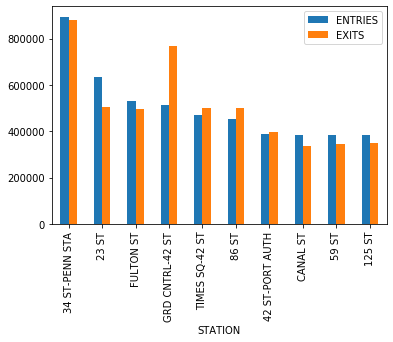

In [210]:
turnstiles.groupby('STATION')['ENTRIES', 'EXITS'].sum().sort_values('ENTRIES', ascending=False).head(10).plot(kind='bar')